<a href="https://colab.research.google.com/github/VKSi/2021_03_GB_NLP/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
Исключим стоп-слова с помощью stop_words='english'.
Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().
 
2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
Исключим стоп-слова с помощью stop_words='english'.
Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().
3. Создайте мешок слов с помощью sklearn.feature_extraction.text.HashingVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.(можно изменить)
Исключим стоп-слова с помощью stop_words='english'.
4. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы


## Подготовка

In [ ]:
import pandas as pd
import numpy as np
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
PATH = 'gdrive/My Drive/AI/GB/NLP/'
PATH_L2 = PATH + 'Lesson2/'
OBJECT_PATH = PATH + 'objects/'

In [ ]:
def save_obj(obj, name: str):
    path = OBJECT_PATH + name + '.pkl'
    with open(path, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
    return path


def load_obj(name: str):
    with open(OBJECT_PATH + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
df = load_obj('result_df_l1')

In [ ]:
df.head()

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,model love you take with you all the time in ur,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time, ur]","[model, love, take, time, ur]","[model, love, take, time, ur]"
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


## Задание 1

Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
Исключим стоп-слова с помощью stop_words='english'.
Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
?CountVectorizer

In [ ]:
def task_123(data: pd.Series, vectorizer):
  documents = [' '.join(x) for x in data]
  vectorizer = eval(f"{vectorizer}(max_df=0.9, max_features=1000, stop_words='english')")

  # Создаем the Bag-of-Words модель
  bag_of_words = vectorizer.fit_transform(documents)

  # Отобразим Bag-of-Words модель как DataFrame
  feature_names = vectorizer.get_feature_names()
  return pd.DataFrame(bag_of_words.toarray(), columns = feature_names), vectorizer

In [ ]:
df_ts_1, v_ts_1 = task_123(df.tweet_stemmed, 'CountVectorizer')
df_ts_1.head()

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,add,adventur,affirm,afternoon,age,ago,agre,ahead,aist,album,aliv,allahsoil,allow,alon,alreadi,altwaystoh,alway,amaz,america,american,amp,angel,anger,angri,anim,anniversari,announc,anoth,answer,anti,...,welcom,went,wet,whatev,white,wife,wild,win,wine,winner,wish,woh,woman,women,wonder,word,work,workout,world,worri,worst,wow,write,wrong,wtf,xx,xxx,ya,yay,ye,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_tl_1, v_tl_1 = task_123(df.tweet_lemmatized, 'CountVectorizer')
df_tl_1.head()

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,affirmation,afternoon,age,ago,agree,ahead,aist,album,alive,allahsoil,altwaystoheal,amazing,america,american,amp,anger,angry,animal,anniversary,anti,anxiety,anymore,app,apple,arrived,ask,attack,august,available,award,...,wet,white,wife,wild,win,wine,winner,wisdom,wish,wishing,woh,woman,wonder,wonderful,word,work,working,workout,world,worry,worst,wow,writing,wrong,wtf,xx,xxx,ya,yay,yeah,year,yes,yesterday,yo,yoga,york,young,youtube,yr,yummy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Задание 2

Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно. Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df. Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000. Исключим стоп-слова с помощью stop_words='english'. Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df_ts_2, v_ts_2 = task_123(df.tweet_stemmed, 'TfidfVectorizer')
df_ts_2.head()

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,add,adventur,affirm,afternoon,age,ago,agre,ahead,aist,album,aliv,allahsoil,allow,alon,alreadi,altwaystoh,alway,amaz,america,american,amp,angel,anger,angri,anim,anniversari,announc,anoth,answer,anti,...,welcom,went,wet,whatev,white,wife,wild,win,wine,winner,wish,woh,woman,women,wonder,word,work,workout,world,worri,worst,wow,write,wrong,wtf,xx,xxx,ya,yay,ye,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_tl_2, v_tl_2 = task_123(df.tweet_lemmatized, 'TfidfVectorizer')
df_tl_2.head()

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,affirmation,afternoon,age,ago,agree,ahead,aist,album,alive,allahsoil,altwaystoheal,amazing,america,american,amp,anger,angry,animal,anniversary,anti,anxiety,anymore,app,apple,arrived,ask,attack,august,available,award,...,wet,white,wife,wild,win,wine,winner,wisdom,wish,wishing,woh,woman,wonder,wonderful,word,work,working,workout,world,worry,worst,wow,writing,wrong,wtf,xx,xxx,ya,yay,yeah,year,yes,yesterday,yo,yoga,york,young,youtube,yr,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Задание 3

Создайте мешок слов с помощью sklearn.feature_extraction.text.HashingVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно. Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df. Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.(можно изменить) Исключим стоп-слова с помощью stop_words='english'.

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

In [ ]:
# df_ts_3, v_ts_3 = task_123(df.tweet_stemmed, 'HashingVectorizer')
# df_ts_3.head()
# Не проходит, так как у этого векторайзера другие параметри (ошибка в задании)

In [ ]:
?HashingVectorizer

Задание сформулированно не корректно. Таких параметров у этого векторайзера нет

In [ ]:
def task_3(data: pd.Series):
  documents = [' '.join(x) for x in data]
  vectorizer = HashingVectorizer(n_features=1000, stop_words='english')

  # Создаем the Bag-of-Words модель
  bag_of_words = vectorizer.fit_transform(documents)

  return vectorizer

In [ ]:
v_ts_3 = task_3(df.tweet_stemmed)

In [ ]:
v_tl_3 = task_3(df.tweet_lemmatized)

## Задание 4

Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы

### tasks 123 vectorizers

In [ ]:
# Загружаем данные
data = open(PATH_L2 + 'corpus').read()
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# создаем df
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels
trainDF.head(5)

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


In [ ]:
from sklearn import model_selection, preprocessing, linear_model
from sklearn.metrics import accuracy_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [ ]:
for vectorizer_name in [f'v_t{j}_{i}' for i in [1, 2, 3] for j in ['s', 'l']]:
  vectorizer = eval(vectorizer_name) 
  xtrain_count =  vectorizer.transform(train_x)
  xvalid_count =  vectorizer.transform(valid_x)
  classifier = linear_model.LogisticRegression()
  classifier.fit(xtrain_count, train_y)
  predictions = classifier.predict(xvalid_count)
  print('-'*35)
  print(f'|  {vectorizer_name}        |        {accuracy_score(valid_y, predictions)}  |')
print('-'*35)

-----------------------------------
|  v_ts_1        |        0.7416  |
-----------------------------------
|  v_tl_1        |        0.764  |
-----------------------------------
|  v_ts_2        |        0.7472  |
-----------------------------------
|  v_tl_2        |        0.7728  |
-----------------------------------
|  v_ts_3        |        0.7744  |
-----------------------------------
|  v_tl_3        |        0.7744  |
-----------------------------------


### max_features

In [ ]:
def task_4(data: pd.Series, vectorizer_name, **params):
  documents = [' '.join(x) for x in data]
  params_str = ', '.join([f'{k}={v}' for k, v in params.items()])
  vectorizer = eval(f"{vectorizer_name}({params_str}, stop_words='english')")

  # Создаем the Bag-of-Words модель
  bag_of_words = vectorizer.fit_transform(documents)

  return vectorizer

In [ ]:
params_ct = {'max_df':0.9, 'max_features':1000}
params_h = {'n_features':1000}

In [ ]:
results = {}
for vectorizer_name in ['CountVectorizer', 'TfidfVectorizer', 'HashingVectorizer']:
  results[vectorizer_name] = {}
  for max_features in range(200, 2000, 200):
    if vectorizer_name == 'HashingVectorizer':
      params_h['n_features'] = max_features
      params = params_h
    else:
      params_ct['max_features'] = max_features
      params = params_ct
    vectorizer = task_4(df.tweet_stemmed, vectorizer_name, **params) 
    xtrain_count =  vectorizer.transform(train_x)
    xvalid_count =  vectorizer.transform(valid_x)
    classifier = linear_model.LogisticRegression()
    classifier.fit(xtrain_count, train_y)
    predictions = classifier.predict(xvalid_count)
    results[vectorizer_name][f'{max_features}'] = accuracy_score(valid_y, predictions)

In [ ]:
from matplotlib import pyplot as plt

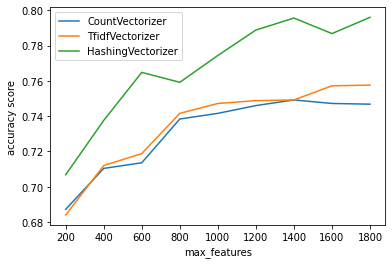

In [ ]:
for vectorizer_name in ['CountVectorizer', 'TfidfVectorizer', 'HashingVectorizer']:
  plt.plot(list(results[vectorizer_name].keys()), list(results[vectorizer_name].values()), label=vectorizer_name)
plt.legend()
plt.xlabel('max_features')
plt.ylabel('accuracy score')
plt.show()

### PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
params_ct = {'max_df':0.9, 'max_features':1500}
params_h = {'n_features':1500}

In [ ]:
results = {}
for vectorizer_name in ['CountVectorizer', 'TfidfVectorizer', 'HashingVectorizer']:
  results[vectorizer_name] = {}
  if vectorizer_name == 'HashingVectorizer':
    params = params_h
  else:
    params = params_ct
  vectorizer = task_4(df.tweet_stemmed, vectorizer_name, **params) 
  for pca_n in range(2, 40, 2):
    pca = PCA(n_components=pca_n)
    xtrain_count =  pca.fit_transform(vectorizer.transform(train_x).todense())
    xvalid_count =  pca.transform(vectorizer.transform(valid_x).todense())
    classifier = linear_model.LogisticRegression()
    classifier.fit(xtrain_count, train_y)
    predictions = classifier.predict(xvalid_count)
    results[vectorizer_name][f'{pca_n}'] = accuracy_score(valid_y, predictions)

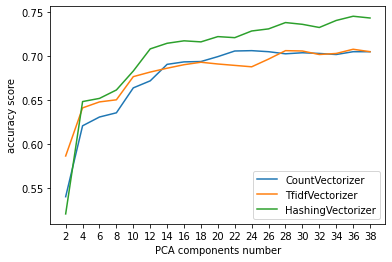

In [ ]:
for vectorizer_name in ['CountVectorizer', 'TfidfVectorizer', 'HashingVectorizer']:
  plt.plot(list(results[vectorizer_name].keys()), list(results[vectorizer_name].values()), label=vectorizer_name)
plt.legend()
plt.xlabel('PCA components number')
plt.ylabel('accuracy score')
plt.show()